In [1]:
import pandas as pd
import numpy as np

In [2]:
""" 11.6 Resampling """

' 11.6 Resampling '

In [3]:
rng = pd.date_range('2000-01-01',periods=100,freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [4]:
ts

2000-01-01   -0.940585
2000-01-02   -0.183815
2000-01-03   -0.075735
2000-01-04   -0.706001
2000-01-05    2.308079
2000-01-06   -0.079990
2000-01-07    0.184803
2000-01-08   -0.182330
2000-01-09    1.181568
2000-01-10   -1.120106
2000-01-11   -0.806127
2000-01-12    0.971559
2000-01-13    0.920017
2000-01-14    0.435858
2000-01-15    1.095647
2000-01-16    1.416599
2000-01-17   -0.401132
2000-01-18    0.012958
2000-01-19    0.303025
2000-01-20   -1.377182
2000-01-21   -1.431470
2000-01-22   -1.235258
2000-01-23    0.169320
2000-01-24    0.100613
2000-01-25   -1.257134
2000-01-26   -0.831119
2000-01-27   -0.745094
2000-01-28    0.595758
2000-01-29   -0.552105
2000-01-30   -0.193296
                ...   
2000-03-11    0.927327
2000-03-12    0.580136
2000-03-13    0.827388
2000-03-14   -0.276593
2000-03-15    0.958576
2000-03-16   -0.759612
2000-03-17    1.005215
2000-03-18    1.225688
2000-03-19   -0.056665
2000-03-20   -2.116700
2000-03-21    0.974833
2000-03-22    0.239765
2000-03-23 

In [5]:
#resample() : passer à une fréquence mensuelle
ts.resample('M').mean()

2000-01-31   -0.061346
2000-02-29    0.062395
2000-03-31   -0.124562
2000-04-30   -0.097861
Freq: M, dtype: float64

In [6]:
#resample fonctionne comme groupby
ts.resample('M',kind='period').mean()

2000-01   -0.061346
2000-02    0.062395
2000-03   -0.124562
2000-04   -0.097861
Freq: M, dtype: float64

In [7]:
""" DownSampling"""

' DownSampling'

In [8]:
rng = pd.date_range('2000-01-01',periods=12,freq='T')

In [9]:
ts = pd.Series(np.arange(12), index=rng)

In [10]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [11]:
#organiser en paquet de 5 min
# closed défini le début ou la fin de l'intervalle
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [12]:
ts.resample('5min',closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [13]:
#skip (pas pigé) label
ts.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [14]:
#skip

In [15]:
""" OHLC resampling : Open-High-Low-Close"""

' OHLC resampling : Open-High-Low-Close'

In [16]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [17]:
""" Upsampling and Interpolation"""

' Upsampling and Interpolation'

In [18]:
frame = pd.DataFrame(np.random.randn(2,4),index=pd.date_range('1/1/2000',periods=2, freq='W-WED'), columns=['Colorado','Texas','New York','Ohio'])

In [19]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.278451,-0.360331,0.481990,2.420418
2000-01-12,1.418919,0.176513,-2.516679,1.733742


In [20]:
#upsampling
df_daily = frame.resample('D').asfreq()

In [21]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.278451,-0.360331,0.481990,2.420418
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.418919,0.176513,-2.516679,1.733742


In [22]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.278451,-0.360331,0.481990,2.420418
2000-01-06,0.278451,-0.360331,0.481990,2.420418
2000-01-07,0.278451,-0.360331,0.481990,2.420418
2000-01-08,0.278451,-0.360331,0.481990,2.420418
2000-01-09,0.278451,-0.360331,0.481990,2.420418
2000-01-10,0.278451,-0.360331,0.481990,2.420418
2000-01-11,0.278451,-0.360331,0.481990,2.420418
2000-01-12,1.418919,0.176513,-2.516679,1.733742


In [23]:
#fill( un certain nombre)
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.278451,-0.360331,0.481990,2.420418
2000-01-06,0.278451,-0.360331,0.481990,2.420418
2000-01-07,0.278451,-0.360331,0.481990,2.420418
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.418919,0.176513,-2.516679,1.733742


In [24]:
#remplir les jeudis
frame.resample('W-THU').ffill()


,Colorado,Texas,New York,Ohio
2000-01-06,0.278451,-0.360331,0.481990,2.420418
2000-01-13,1.418919,0.176513,-2.516679,1.733742


In [25]:
""" Resampling with periods"""

' Resampling with periods'

In [26]:
#resampling data indexed by periods
frame = pd.DataFrame(np.random.randn(24,4),index=pd.period_range('1-2000','12-2001',freq='M'), columns=['Colorado','Texas','New York','Ohio'])

In [27]:
frame

,Colorado,Texas,New York,Ohio
2000-01,-0.005836,1.294682,-2.002935,1.355412
2000-02,0.566457,0.893485,0.289659,-0.976113
2000-03,-1.327758,-1.787629,0.675413,1.428180
2000-04,-0.465394,-0.744389,0.359086,-1.144798
2000-05,-0.246782,-0.295746,-0.415156,-0.181142
2000-06,-0.419722,-0.281935,-0.247354,1.570291
2000-07,-0.895069,0.807294,1.721720,-0.564912
2000-08,0.600413,1.092214,-0.730085,0.751656
2000-09,-1.078953,0.883026,-0.196649,-1.005110
2000-10,0.052693,0.357458,0.097848,0.014501


In [28]:
annual_frame = frame.resample('A-DEC').mean()

In [29]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.435243,0.341688,-0.023175,-0.157439
2001,-0.337976,-0.560714,-0.146695,0.375772


In [30]:
#Skip (Quarter)

In [31]:
""" 11.7 Moving Window Functions """

' 11.7 Moving Window Functions '

In [32]:
close_px_all = pd.read_csv('stock_px_2.csv',parse_dates=True,index_col=0)

In [33]:
close_px_all

,AAPL,MSFT,XOM,SPX
time,,,,
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66


In [34]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

In [35]:
close_px = close_px.resample('B').ffill()#resample en Business Day

In [36]:
close_px.AAPL.plot()

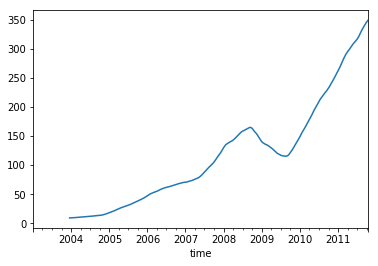

In [37]:
close_px.AAPL.rolling(250).mean().plot()

In [38]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [39]:
appl_std250[5:12]

time
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

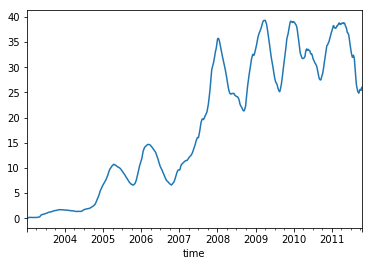

In [40]:
appl_std250.plot()

In [41]:
expanding_mean = appl_std250.expanding().mean()

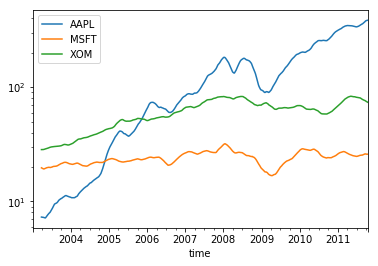

In [42]:
close_px.rolling(60).mean().plot(logy=True)

In [43]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
time,,,
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
